In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from lenet import LeNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import tensorflow as tf
import tensorflow_datasets.public_api as tfds
import matplotlib.pyplot as plt
import numpy as np

In [11]:
print("[INFO] accessing MNIST...")
((trainData, trainLabels),(testData,testLabels))=mnist.load_data()

trainData=trainData.reshape((trainData.shape[0],28,28,1))
testData=testData.reshape((testData.shape[0],28,28,1))

trainData=trainData.astype("float32")/255.0
testData=testData.astype("float32")/255.0

print(trainData.shape)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

numclass=10
trainLabels=tf.keras.utils.to_categorical(trainLabels,num_classes=numclass)
testLabels=tf.keras.utils.to_categorical(testLabels,num_classes=numclass)

[INFO] accessing MNIST...
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [15]:
# inisialize the optimizer and model
print("[INFO] compiling model...")
opt=SGD(lr=0.01)
model=LeNet.build(width=28,height=28,depth=1,classes=numclass)
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H=model.fit(trainData,trainLabels,validation_data=(testData,testLabels),batch_size=128,epochs=10)

[INFO] compiling model...
[INFO] training network...
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.5859 - accuracy: 0.5354 - val_loss: 0.3151 - val_accuracy: 0.9078
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2810 - accuracy: 0.9161 - val_loss: 0.1963 - val_accuracy: 0.9435
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1921 - accuracy: 0.9434 - val_loss: 0.1464 - val_accuracy: 0.9558
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1484 - accuracy: 0.9560 - val_loss: 0.1244 - val_accuracy: 0.9639
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1212 - accuracy: 0.9637 - val_loss: 0.0925 - val_accuracy: 0.9735
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1027 - accuracy: 0.9705 - val_loss: 0.0878 - val_accuracy: 0.9733
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0932 - accuracy: 0.

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.96      0.97      1010
           4       0.98      0.99      0.99       982
           5       0.96      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



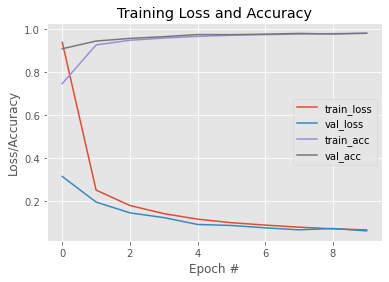

In [17]:
# evaluate the network
print("[INFO] evaluating network...")
predictions=model.predict(testData,batch_size=128)

cr=classification_report(testLabels.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in range(numclass)])
print(cr)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,10),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,10),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,10),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,10),H.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [18]:
model.evaluate(testData,testLabels,verbose=0)

[0.06256212294101715, 0.9797000288963318]

In [19]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}